## Imports

In [1]:
import torch

from PIL import Image
import numpy as np

from fastai.torch_core import set_seed

from diffusers import UNet2DModel, DDPMScheduler

## Hyperparameter

In [2]:
bs = 64
lr = 10e-3
epochs= 10

## Device

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data

## Pipeline

In [4]:
scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256", use_safetensors= True).to(device)

d:\ai_bender\projects\shadowverse_avatar\venv_sa\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
scheduler.set_timesteps(50)
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [6]:
set_seed(42)

In [7]:
sample_size = model.config.sample_size
in_channels = model.config.in_channels
noise = torch.randn((1, in_channels, sample_size, sample_size), device= device)

In [8]:
inp = noise

for t in scheduler.timesteps:

    with torch.no_grad():
        noise_residual = model(inp, t).sample

    prev_noisy_sample = scheduler.step(noise_residual, t, inp).prev_sample
    inp = prev_noisy_sample

d:\ai_bender\projects\shadowverse_avatar\venv_sa\lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


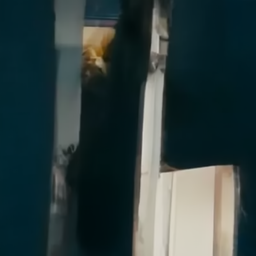

In [9]:
image = (inp / 2 + 0.5).clamp(0, 1).squeeze()
image_np = (image.permute(1, 2, 0) * 255).round().to(torch.uint8).cpu().numpy()
image_np = Image.fromarray(image_np)
image_np

## Text-to-Image Generation